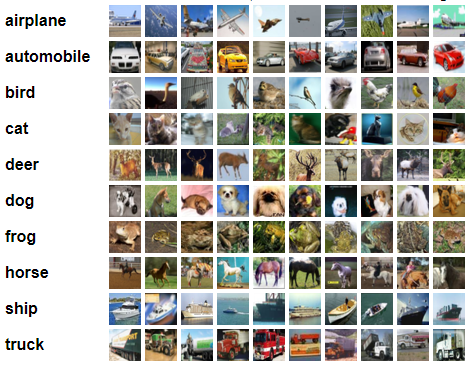

# Building a Convolutional Neural Network

## Image classification
In this project, we will build a convolutional neural network to solve a multiclass image classification problem.

For this, we'll use the “CIFAR-10” dataset available on Keras. It includes 60000 32 by 32 images of 10 classes.

## Importing the required libraries
We'll start with importing required libraries.

📌 Use the keyword "import".

In [1]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Dataset
Let's download the CIFAR-10 dataset which is included in Keras and assign it to the corresponding variables *X_train*, *y_train*, *X_test*, and *y_test*.

📌 Use the datasets.cifar10.load_data() function of the Keras.

In [2]:
# Download the cifar-10 dataset included in Keras
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


Now, we can print the the number of samples in the X_train and X_test datasets to see how the dataset is distributed.

📌 Use f-strings for this.

In [3]:
# Print the number of samples 
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 50000
X_test: 10000


Before we move on with the preprocessing of the data, we can print a random sample to see what the data looks like.

In [5]:
# Print a sample from X_test dataset
print(X_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


The numbers we see here are pixel values. This is how computers see images. But like this, it doesn’t mean much to us. Let’s visualize this sample.

📌 Convert the pixel values into an image by using the *imshow()* function of the Matplotlib library. 

📌 Print the shape of the image using *shape*.

(32, 32, 3)


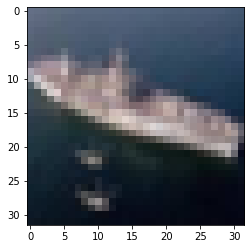

In [6]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[789])
# Print the shape of the sample image
print(X_test[789].shape)

## Preprocessing
Great! With this knowledge, we can adjust our dataset for further use.

We need three datasets: train, validate, and test.
We can separate 10000 images from the train dataset, and use it as the validation dataset.

📌 You can use list slicing for this.

In [7]:
# Create the validation datasets 
# and assign the last 10000 images of X_val and y_val
X_val = X_train[40000:]
y_val = y_train[40000:]

# Create new train datasets
# and assign the first 40000 images of X_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]

Let's check the number of samples in each dataset to see the final results.

📌 Use f-strings for this.

In [9]:
# Print the lengths of the each dataset
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")

X_train: 40000
X_val: 10000
X_test: 10000


### Normalization

Since pixel values are between 0 and 255, dividing these values by 255 will scale each of them to values between 0 and 1.

📌 Divide each dataset by 255.

In [10]:
# Divide each dataset by 255
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

## Constructing the neural network

That was it for the preprocessing of the data! 

Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [11]:
# Create a model object
model = tf.keras.Sequential()

### Feature extraction layers

For the first two layers, we add a convolution and max pooling layer.

📌 Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

📌 Use .add() method of the object to add the layer.

In [16]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

Then, we add more layers. One convolution, one max pooling, and one convolution layer again.

📌 Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

📌 Use .add() method of the object to add the layer.

In [18]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))

### Flatten

To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

📌 Use tf.keras.layers.Flatten() to flatten the layers.

📌 Use .add() method of the object to add the layer.

In [19]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

### Classification layers

Now that we have the features extracted, we can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

📌 Use tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.

In [20]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

### Output layer

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

In [21]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

### Optimizer

Now we have the structure of our model. To configure the model for training, we'll use the .compile() method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Sparse Categorical Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

In [25]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

📌 Use .fit() method of the model object for the training.

In [26]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train,y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data=(X_val,y_val))

Epoch 1/50
313/313 [==============================] - 15s 9ms/step - loss: 2.0099 - accuracy: 0.2271 - val_loss: 1.6772 - val_accuracy: 0.3954
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7207 - accuracy: 0.3430 - val_loss: 1.4664 - val_accuracy: 0.4859
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5697 - accuracy: 0.4155 - val_loss: 1.3000 - val_accuracy: 0.5420
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 1.4678 - accuracy: 0.4589 - val_loss: 1.2245 - val_accuracy: 0.5840
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3813 - accuracy: 0.4933 - val_loss: 1.1577 - val_accuracy: 0.5888
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3190 - accuracy: 0.5188 - val_loss: 1.0807 - val_accuracy: 0.6322
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2534 - accuracy: 0.5480 - val_loss: 1.0466 - val_accuracy: 0.6482
Epoch

### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

📌 Use plt.show() to display the graph.

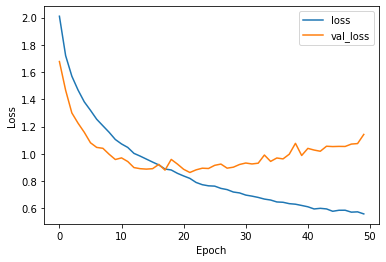

In [27]:
# Plot the the training loss
plt.plot(results.history["loss"],label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"],label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

Now do the same thing for accuracy.

📌 Accuracy scores can be found in:
* results.history["accuracy"]
* results.history["val_accuracy"]



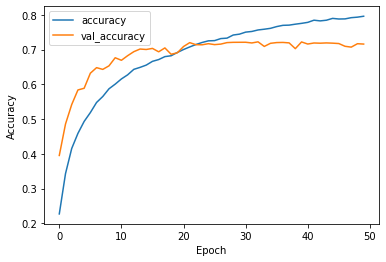

In [29]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

## Performance evaluation

Let's use the test dataset we created to evaluate the performance of the model.

📌 Use test_on_batch() method with test dataset as parameter

In [30]:
# Evaluate the performance
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1946 - accuracy: 0.7037


[1.19462251663208, 0.7037000060081482]

### Try a prediction

Next, we take the sample we selected at the beginning and make a prediction on it.

📌 Reshape the image to (1,32,32,3)

📌 Use the *.prediction()* method of the model object

In [31]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))

# Print the prediction result
prediction_result

array([[2.4145807e-04, 1.6195011e-10, 1.2047527e-15, 8.7098254e-20,
        6.5021065e-23, 2.5845825e-24, 1.3029972e-21, 1.4672933e-27,
        9.9975854e-01, 9.4978376e-13]], dtype=float32)

Finally, we find the predicted class and prediction probability and print the results.

📌 Use .argmax() to find the class.

📌 Use .max() to find the probability.

In [32]:
# Find the predicted class
predected_class = prediction_result.argmax()
# Find the prediction probability
prediction_probability = prediction_result.max()

In [33]:
# Print the results
print(f"This image belong to class {predected_class} with {prediction_probability} prediction probability")

This image belong to class 8 with 0.9997585415840149 prediction probability
